<a href="https://colab.research.google.com/github/mrprodigy/university-projects/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Approximation of mathematical functions

## Working on the assignment, todo and not todo:
<b><u>Todo</u></b>:<br />
<div class="alert alert-success">
<ul><li>&#x2714; <b> Work by yourself</b> and submit your own assignment, <b>no pairing</b> to other students</li>
<li>&#x2714; Test and save your assignment - <b>submit the last tested and saved version</b></li>
<li>&#x2714; to <b>submit</b> the assignment, download the notebook (File → Download .ipynb in Google Colab)</li>
<li>&#x2714; submit <b>only</b> the <b>ipynb</b> file under the name <b>hw1.ipynb</b></li>
<li>&#x2714; It is advisable to add extra cells to check your code implementation</li></ul>
</div>
<b><u>Not todo</u></b>:<br />
<div class="alert alert-danger">
<ul><li>&#x2718; do <b>NOT</b> submit an <b>empty assignment</b></li>
<li>&#x2718; do <b>NOT submit extra files</b>, <u>unless you're asked to do so</u></li>
<li>&#x2718; <b>Do NOT submit a .py/.txt/.rar/.zip (or any non (.ipynb) file)</b> <u>version for the notebook</u> of the assignment</li>
<li>&#x2718; <b>do NOT change</b> the notebook file name</li></ul>
</div>

In [7]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


## Question 1: Approximating cosine function

Function $\cos$ is defined on positive real numbers: $\cos(x): \mathcal{R} \rightarrow [-1, 1]$. The Taylor series for $\cos$ has [the following form](https://en.wikipedia.org/wiki/Sine_and_cosine):

\begin{align}\cos (x)  &= 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots \\
&= \sum_{n=0}^\infty (-1)^{n}\frac{x^{2n}}{2n!}
\end{align}



1. Implement `cos1` that approximates $\cos(x)$



In [9]:
def cos1(x, n):
    """Computes cos(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    fact = 1
    val = 1
    xi = 1
    sign = 1
    for i in range(1, n+1):
        fact *= (2*i)*(2*i + 1)  
        xi *= x*x
        sign = -sign
        val += sign*xi/math.factorial(2*i)
    return val

**bold text** 2. Plot  `np.cos` and `cos1` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.   
    

   


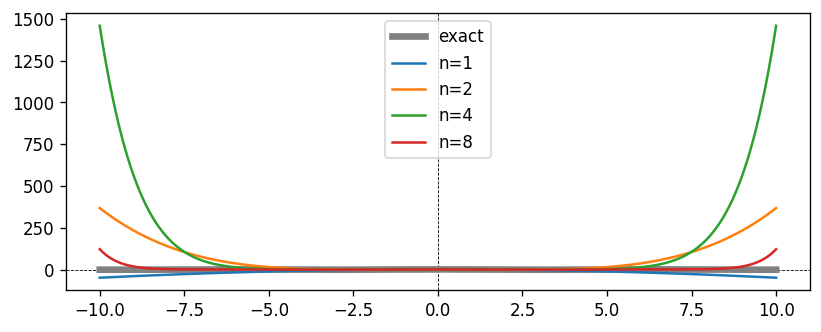

In [10]:
def plot_fun(f, g, min=-5, max=5, logn_from=0, logn_till=4):
  """Plots approximate function f with a finite number of terms of Taylor
  series, and accurate function g for a range of arguments between min and max.
  f is plotted for numbers of Taylor series terms ranging exponentially from
  2**logn_from to 2**(logn_till-1), inclusive.
  Arguments:
     f - approximate function f(x, n) computing the value at x using n terms
        of Taylor series.
     g - accurate (practically exact) function g(x).
     min - minimum value of the range of arguments.
     max - maximum value of the range of arguments.
     logn_from - the smallest number of Taylor series terms is 2**logn_from.
     logn_till - the largets number of Taylor series terms is 2**(logn_till-1).
  """
  # Create a vector of 10000 values equally spaced between min and max.
  x=np.linspace(min, max, 10000)
  # Prepare a canvas for the graph.
  plt.figure(figsize=(8, 3)).set_dpi(120)
  # Plot axes x=0 and y=0, dashed.
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  # Plot the 'exact' function.
  plt.plot(x, g(x), label="exact", c='gray', lw=4)
  # For each number of Taylor series terms ...
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      # Plot the Taylor approximation
      plt.plot(x, y, label=f"n={n}")
  # Display the legend
  plt.legend()

plot_fun(cos1, np.cos, -10, 10)

[link text](https://)3. Implement `cos2` that approximates $\cos(x),\,-\infty < x < \infty$ in a more efficient way. _Hint:_ $\cos (x + \pi) = - \cos(x)$.


In [5]:
from numpy import floor
def cos2(x, n):
   pi=math.pi
   sign = 1
   if x < 0:
     sign = -sign
     x = -x
   k = int(x/pi)
   x -= k*pi
   if k % 2 == 1:
     sign = -sign
   return sign*cos1(x, n)



 4. Plot  `np.cos` and `cos2` for $-10 ≤ x ≤ 10$ for $n=1,2,4,8$.   
    



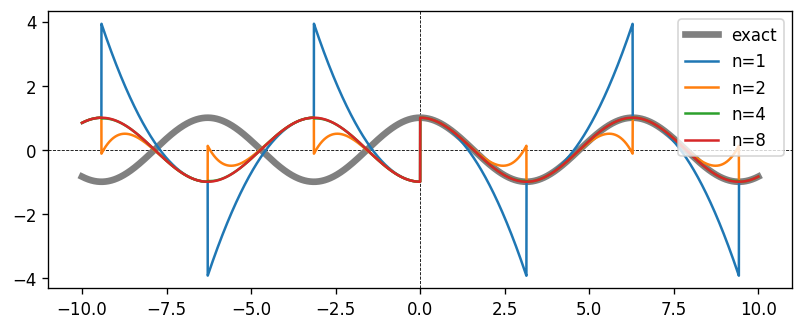

In [11]:
plot_fun(cos2, np.cos, -10, 10)

5.
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [0, 1, 2, 3]$? 
* What are the maximum absolute and relative errors of `cos1` compared to `cos2` on the set of points $x \in [4, 5, 6, 7]$? 

For every $x$ you should print the maximum absolute and relative for `cos1` and for `cos2`. Use $n=8$ for both cases

In [29]:
n = 8
def maxError(start,end):
  # res = { f1={abs,rel}, f2={abs,rel}}
  res = dict(f1 = dict(abs=-1,rel=-1), f2 = dict(abs=-1,rel=-1))
  abs1,abs2,rel1,rel2 = [],[],[],[]

  for x in range(start,end):
    og = np.cos(x)
    res1 = cos1(x, n)
    res2 = cos2(x, n)
    abs1.append(abs(og - res1))
    abs2.append(abs(og - res2))
    rel1.append(abs(og - res1)/og)
    rel2.append(abs(og - res2)/og)
  res['f1']['abs'] = max(abs1)
  res['f2']['abs'] = max(abs2)
  res['f1']['rel'] = max(rel1)
  res['f2']['rel'] = max(rel2)
  return res

print("low range:")
res = maxError(0,4)
  
print("maximum absulute error:")
print("in cos1:",res['f1']['abs'])
print("in cos2:",res['f2']['abs'])

print("maximum relative error:")
print("in cos1:",res['f1']['rel'])
print("in cos2:",res['f2']['rel'])

print("============================")
print("high range:")
res = maxError(4,8)

print("maximum absulute error:")
print("in cos1:",res['f1']['abs'])
print("in cos2:",res['f2']['abs'])

print("maximum relative error:")
print("in cos1:",res['f1']['rel'])
print("in cos2:",res['f2']['rel'])



low range:
maximum absulute error:
in cos1: 5.910629896632713e-08
in cos2: 5.910629896632713e-08
maximum relative error:
in cos1: 0.0
in cos2: 0.0
high range:
maximum absulute error:
in cos1: 0.22473969129055693
in cos2: 2.480959382378245e-08
maximum relative error:
in cos1: 0.2981018958304072
in cos2: 2.5838743573635032e-08


## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `exp2`  from [lecture 1 notebook](https://colab.research.google.com/drive/1-UKYN6p63tcqhPUg2TAUMsaJz0hUv1x0?usp=sharing) and `cos2` from Q1 to implement the function:
 $f(x)=cos(e^{x})$ 
 and implement the same function with `math.exp` and `np.cos`.



In [14]:
def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result

def exp2(x, n):
  e = 2.718281828459045
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

def myCosExp(x,n):
  return cos2(exp2(x,n),n)



2. Compare both implemetations in term of <br><b>absolute error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


In [19]:
for i in [10,50,100,200]:
  print(i,"my crappy calculation:",myCosExp(i,8))
  print(i,"real result:",np.cos(math.exp(i)))

10 my crappy calculation: -0.7250423180095353
10 real result: -0.7250423179995003
50 my crappy calculation: 1.0
50 real result: 0.8820756613185766
100 my crappy calculation: 1.0
100 real result: -0.04229861514908033
200 my crappy calculation: 1.0
200 real result: 0.4406889885356884


3. Compare both implemetations in term of <br><b>relative error</b>.
Check the cases which $x \in [10, 50, 100, 200]$. Use $ n = 8$


4. Lets define a "special" number to be an natural number $x\in \mathbb{N}$ such that $f(x) > 0$. (the function from Q2.1)
find one "special" number, x, that using the approximated $f(x)$ ($f_{approx}$), with `exp2` and `cos2`, it is holds that $f_{approx}(x) \leq 0$.
Use $n = 8$.


5. What is the minimal value of $n$ (number of Taylor series elements) for which, the absolute difference between the <br><b>relative errors</b> of $f_{approx}(10)$ computed for `n` and `n+1` and `n+1` and `n+2`  is smaller than $10^{-8}$ ? 

\begin{align}
      \text{relative error = }\frac{|real - approx|}{|real|}
    \end{align}